# Neural Networks

Image classification, Nosiy data analysis, and regression analysis are some of the applications of neural networks.

## Input Output Vectors

\begin{align*}
\bar x & \in \mathbb{R}^N \\
\text{Kat} &= \begin{bmatrix}1 \\ 0 \end{bmatrix} \\
\text{Doge} &= \begin{bmatrix}0 \\ 1 \end{bmatrix} \\
\end{align*}

Say $x_1 = \begin{bmatrix}1 \\ -1 \end{bmatrix}$ and $x_2 = \begin{bmatrix}0 \\ 1 \end{bmatrix}$ represent cats and $y_1 = \begin{bmatrix}1 \\ 1 \end{bmatrix}$ represents a dog. 

Then the task is to find matrix $M = \begin{bmatrix}a & b \\ c & d \end{bmatrix} $ such that:

\begin{align*}
\begin{bmatrix}1 \\ -1 \end{bmatrix} M &= \begin{bmatrix}0 \\ 1 \end{bmatrix} \\
\begin{bmatrix}0 \\ 1  \end{bmatrix} M &= \begin{bmatrix}0 \\ 1 \end{bmatrix} \\
\begin{bmatrix}1 \\ 1  \end{bmatrix} M &= \begin{bmatrix}1 \\ 0 \end{bmatrix} \\
\end{align*}

## Activation Functions
It becomes difficult to satisfy all the constraints. So the goal is to find a solution that satisfies most constraints. We use a non-linear "activation" function.
Commonly used function is a sigmoid function
$$g(p) = \frac{1}{1+e^{-\alpha p}}$$
where $\alpha$ is a parameter that determines the steepness of the function.

### Setting $\alpha$
$$z_{M \times 1} = \begin{bmatrix} z_1 \\ z_2  \\ \vdots \\ z_{M} \end{bmatrix} = g \begin{bmatrix} (Ax)_1 \\ (Ax)_2 \\ \vdots \\ (Ax)_M \end{bmatrix}$$
$$(Ax)_i = \sum_{j=1}^{N} A_{ij} x_j = y_i$$
$$x_j \to x_j - \text{Median}(x)$$
$$\alpha = \frac{10}{n \ \text{max}(x)}$$

## Training
Finding the matrix $A$. Say there are $T$ samples. Then the goal is to find $A$ such that:
$$A = \min_{A} \sum_{t=1}^{T} \left\lVert g(Ax_t) - y_t \right\rVert^2$$ 
and the error function $f$ is defined as
$$f(A_t) = \sum_{t=1}^{T} \left\lVert g(Ax_t) - y_t \right\rVert^2$$
We use a well known algorithm called gradient descent to find the matrix $A$.
$$\nabla f = \frac{\partial}{\partial x} f(x) \hat x + \frac{\partial}{\partial y} f(x) \hat y$$
Then the $A$ matrix in the next iteration will be
$$A_{t+1} = A_t - \eta \nabla f$$
where $\eta$ is a small number called the learning rate. If $\eta$ is too small, the algorithm will take a long time to converge. If $\eta$ is too large, the algorithm may diverge/be unstable.

[1.99996432 3.        ]


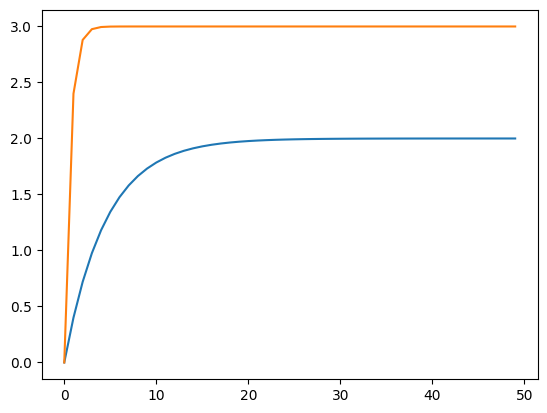

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: x**2 + 4*y**2 - 4*x- 24*y+ 40
grad = lambda x, y: np.array([2*x-4, 8*y-24])

r0 = np.array([0, 0])
i = 0

eta = 0.1
error = 10
eps = 1e-5

pts_x = []
pts_y = []

pts_x.append(r0[0])
pts_y.append(r0[1])

while error > eps:
    r1 = r0 - eta*grad(r0[0], r0[1])
    error = np.sqrt(np.sum((r1-r0)**2))
    r0 = r1
    pts_x.append(r0[0])
    pts_y.append(r0[1])
    i+=1

print(r1)

plt.plot(range(i+1), pts_x)
plt.plot(range(i+1), pts_y)
plt.show()

## Gradient Descent

Algorithm
- Initial random A of order unity
- Loop over each training pair
- Compute $z = g(Ax)$
- Compute $\frac{\partial}{\partial A_{pq}} f$ using the below formula
- Update $A_{pq} = A_{pq} - \alpha \frac{\partial}{ \partial A_{pq}} f$
- This is one "epoch"
- Repeat for many epochs

\begin{align*}
\bar z &= g(A \bar x) = g(\sum_{j=1}^{N}(A_{ij}x_j)) \\
\frac{\partial}{\partial A_{pq}} f &= \sum_{i=1}^{m} 2(z_i-y_i) \frac{\partial}{\partial A_{pq}} z_i \\
&= g'(y_i) \frac{\partial}{\partial A_{pq}} \sum_j A_{ij} x_j \\
&= g'(y_i) \sum_j \delta_{ip} \delta_{jq} x_j \\
&= g'(y_i) \delta_ip x_q \\
\frac{\partial}{\partial A_{pq}} f  &= 2(z_p - y_p) \ \alpha \ g(y_p) \ (1-g(y_p)) \ x_q
\end{align*}


## Hidden Layers

<img src="https://th.bing.com/th/id/OIP.54vnqHKULgaD1wkAZjkxmAAAAA?rs=1&pid=ImgDetMain">

## Different models

Images can also be transformed, like left-right inversion or time inversion. 

Convolutional Neural Networks - while encoding an image from 2D to a 1D array, the corellation between adjacent pixels horizontally may not be captured. So a convolution is made to get the correlation between pixels. This is done by sliding a kernel over the image. The kernel is a small matrix that slides over the image, performing a dot product at each position. 

## Example


In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

T = 6

inputx = np.zeros([T, 3])
outputy = np.zeros([T])

inputx[0, :] = np.array([0.45, 0.6, -0.27])
inputx[1, :] = np.array([0.85, -0.57, -0.14])
inputx[2, :] = np.array([0.02, 0.96, -0.15])
inputx[3, :] = np.array([-0.63, 0.79, -0.25])
inputx[4, :] = np.array([-0.82, 0.15, -0.45])
inputx[5, :] = np.array([0.48, 0.75, -0.64])

outputy[0] = 1
outputy[1] = 0
outputy[2] = 1
outputy[3] = 0
outputy[4] = 1
outputy[5] = 0

X = torch.tensor(inputx, dtype=torch.float32)
y = torch.tensor(outputy, dtype=torch.float32).reshape(-1, 1)

In [2]:
model = nn.Sequential(
    nn.Linear(3, 12),
    nn.Sigmoid(),
    nn.Linear(12, 8),
    nn.Sigmoid(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=12, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [20]:
import tqdm
loss_fn = nn.MSELoss()

# gradient descent
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 1000
batch_size = 1

l = 0

for epoch in tqdm.tqdm(range(n_epochs)):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        loss = loss_fn(y_pred, y[i:i+batch_size])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        l = loss
        #print(f'Finished epoch {epoch+1}, loss: {loss.item()}')

print(model)
print(f'L:{loss}')

100%|██████████| 1000/1000 [00:07<00:00, 142.28it/s]

Sequential(
  (0): Linear(in_features=3, out_features=12, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)
L:1.9288725638944015e-07


In [22]:
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
ans = np.where(y_pred>0.5, 1, 0)
print(f'Accuracy: {accuracy:.4f}')
print(ans)

Accuracy: 1.0000
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]]


# Physics Informed Neural Networks
PINNs can also be used to solve differential equations describing physical laws. Its possible that a NN may not be able to predict some function and just give a constant always. Instead if it knows that the data corresponds to a differential equation, it can learn the coeffecient terms and perform better.
$NN(t, \theta) = x(t)$.
We will not require training data.

There are 2 kinds of losses.
- Boundary loss $\displaystyle f_b = \lambda_1 (NN(t=0, \theta)-1)^2 + \lambda_2 \bigg(\frac{d}{dt}NN(t=0, \theta)-0 \bigg)^2$
- Diff eqn loss (Physics loss) $\displaystyle f_p = \frac{\lambda_3}{N_p} \sum_{i=1}^{N_p} \bigg[ m \frac{d^2}{dt^2} NN(t_i) + \mu \frac{d}{dt} NN(t_i) + k NN(t_i) \bigg]^2$